In [1]:
import pandas as pd 
import numpy as np
from helpers import *
import coach_dicts
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss, roc_curve, auc


# Display plots inside the notebook
%matplotlib inline

# Ignore warning related to pandas_profiling
import warnings
warnings.filterwarnings('ignore') 

from pathlib import Path

# Display all dataframe columns in outputs (it has 63 columns, which is wider than the notebook)
# This sets it up to display with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 800) 
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1800)

In [2]:
path = os.environ.get("DATA_PATH")

In [3]:
data = "intervention_only_leona_2.csv"

In [4]:
df = pd.read_csv(path + data, sep= ";", low_memory = False)

In [5]:
df.replace (' ', np.nan, inplace=True)

### Create shortened df 

The following predictors were chosen for the current analysis:

- df2 = BDI/PHQ (Post), PHQ M1, Pre: SKID-Diagnosen, IMET, EUROHIS_QUOL, BDI, PHQ-D, PHQ-S, GAD, Soziodemographisch, Costa, GPSE, BSSS, PATHEV + EUHEALS, IPQ-R, PVQ, SEWiP, Nutzung d. Gesundheitswesens 
- additional = 2_letter, 2_letter_size, 2_fb_size, 2_reminder, 2_module, 1_letter, 1_letter_size

In [6]:
column_zwei = ['registration','studyVariant','coach','PRE_bdi1','PRE_bdi2',
               'PRE_bdi3','PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10',
               'PRE_bdi11','PRE_bdi12','PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18',
               'PRE_bdi19','PRE_bdi20','PRE_bdi21','POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9',
               'PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9','PRE_phqS10','PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5',
               'PRE_phqD6','PRE_phqD7','PRE_phqD8','PRE_phqD9', 'PRE_birth','PRE_sex','PRE_education',
               'PRE_work','PRE_household','PRE_relation','PRE_residence','PRE_internet','PRE_height','PRE_weight',
               'PRE_treatment','PRE_support','PRE_kPT','PRE_ill','PRE_sickleave','PRE_doc',
               'PRE_neurol','PRE_selfhelp','PRE_counsel','PRE_therapy','PRE_med','PRE_hospital',
            'PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5',
               'PRE_eurohis6','PRE_eurohis7','PRE_eurohis8', 'TI_score','TI_bip1',
               'TI_bip2','TI_MDE','TI_dyst','TI_F25','TI_F22','TI_F23',
               'TI_F29','TI_MDE_vr','TI_MDE_tr','TI_HYP_vr','TI_MAN_vr','TI_medik','TI_rekrut','PRE_gad1',
               'PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7', 'PRE_costa1', 'PRE_costa2', 'PRE_costa3',
              'PRE_costa4', 'PRE_costa5', 'PRE_costa6', 'PRE_costa7', 'PRE_costa8', 'PRE_costa9', 'PRE_costa10', 'PRE_costa11',
              'PRE_costa12', 'PRE_costa13', 'PRE_costa14', 'PRE_costa15', 'PRE_costa16', 'PRE_costa17', 'PRE_costa18',
              'PRE_costa19', 'PRE_costa20', 'PRE_costa21', 'PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4',
              'PRE_pathev5', 'PRE_pathev6', 'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10', 
              'PRE_euheals1','PRE_euheals2','PRE_euheals3','PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18', 'PRE_bsss1','PRE_bsss2','PRE_bsss3',
               'PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8','PRE_bsss9','PRE_bsss10','PRE_bsss11',
               'PRE_bsss12','PRE_bsss13','PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10','PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5',
               'PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9','PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14',
               'PRE_pvq15','PRE_pvq16','PRE_pvq17','PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21', 'PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10', 'M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6',
               'M1_phqD7','M1_phqD8','M1_phqD9', 'M3_phqD1', 'M3_phqD2', 'M3_phqD3', 'M3_phqD4', 'M3_phqD5', 'M3_phqD6',
               'M3_phqD7', 'M3_phqD8', 'M3_phqD9', 'M4_phqD1','M4_phqD2','M4_phqD3','M4_phqD4','M4_phqD5','M4_phqD6',
               'M4_phqD7','M4_phqD8','M4_phqD9',
              'M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21',
                'M3_costa1','M3_costa2','M3_costa5','M3_costa6','M3_costa8',
                    'M3_costa10','M3_costa11','M3_costa12','M3_costa13','M3_costa14','M3_costa15',
                    'M3_costa18']

In [7]:
column_eins = ['registration','studyVariant','coach','PRE_bdi1','PRE_bdi2',
               'PRE_bdi3','PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10',
               'PRE_bdi11','PRE_bdi12','PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18',
               'PRE_bdi19','PRE_bdi20','PRE_bdi21','POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9',
               'PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9','PRE_phqS10','PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5',
               'PRE_phqD6','PRE_phqD7','PRE_phqD8','PRE_phqD9', 'PRE_birth','PRE_sex','PRE_education',
               'PRE_work','PRE_household','PRE_relation','PRE_residence','PRE_internet','PRE_height','PRE_weight',
               'PRE_treatment','PRE_support','PRE_kPT','PRE_ill','PRE_sickleave','PRE_doc',
               'PRE_neurol','PRE_selfhelp','PRE_counsel','PRE_therapy','PRE_med','PRE_hospital',
               'PRE_hos_other', 'PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5',
               'PRE_eurohis6','PRE_eurohis7','PRE_eurohis8', 'TI_score','TI_bip1',
               'TI_bip2','TI_hyp_x','TI_MDE','TI_dyst','TI_MDE_x','TI_20_xx','TI_F20_8','TI_F25','TI_F22','TI_F23',
               'TI_F29','TI_MDE_vr','TI_MDE_tr','TI_HYP_vr','TI_MAN_vr','TI_medik','TI_rekrut','PRE_gad1',
               'PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7', 'PRE_costa1', 'PRE_costa2', 'PRE_costa3',
              'PRE_costa4', 'PRE_costa5', 'PRE_costa6', 'PRE_costa7', 'PRE_costa8', 'PRE_costa9', 'PRE_costa10', 'PRE_costa11',
              'PRE_costa12', 'PRE_costa13', 'PRE_costa14', 'PRE_costa15', 'PRE_costa16', 'PRE_costa17', 'PRE_costa18',
              'PRE_costa19', 'PRE_costa20', 'PRE_costa21', 'PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4',
              'PRE_pathev5', 'PRE_pathev6', 'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10', 
              'PRE_euheals1','PRE_euheals2','PRE_euheals3','PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18', 'PRE_bsss1','PRE_bsss2','PRE_bsss3',
               'PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8','PRE_bsss9','PRE_bsss10','PRE_bsss11',
               'PRE_bsss12','PRE_bsss13','PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10','PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5',
               'PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9','PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14',
               'PRE_pvq15','PRE_pvq16','PRE_pvq17','PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21', 'PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10']

To Do:
* df["dropout"] umändern in binäre Variablen
* Study Variant in binäre Variable
* Birth Year in Age umwandeln
* Hight und Weight in BDI umwandeln
* Anzahl Diagnosen zählen
* Therapist Variablen anonymisieren und Alter, Geschlecht, Abschluss extrahieren
* Skalen auswerten: IPQr8 umpolen, IMET10 umpolen
* Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence
* Standardize TI_Score, BMI, Age, Internet (optional; not necessary for RF; erst nach Train-Test_Split)
* Transform Post_BDI to RCI 
* Idea: Handle registration date as cyclical feature
* Idea: Fancier strategies for missing values

Notizen:
* PRE_pt_planned raus, da PatientInnen ausgeschlossen werden, die eine PT geplant haben

In [8]:
df2 = df[column_zwei]

# 1. Prepare first dataframe for first analysis 

## 1.1 Check out Missing Values 

### 1.1.1 Drop rows with missing values on outcome

In [9]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 270 columns.
There are 178 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
POST_phqD1,499,28.1,"[nan, 2, 0, 1, 3]"
POST_phqD3,499,28.1,"[nan, 1, 0, 2, 3]"
POST_phqD4,499,28.1,"[nan, 2, 1, 3, 0]"
POST_phqD5,499,28.1,"[nan, 1, 2, 0, 3]"
POST_phqD6,499,28.1,"[nan, 2, 0, 1, 3]"
POST_phqD7,499,28.1,"[nan, 1, 0, 2, 3]"
POST_phqD8,499,28.1,"[nan, 0, 1, 2, 3]"
POST_phqD9,499,28.1,"[nan, 1, 0, 2]"
POST_phqD2,499,28.1,"[nan, 2, 0, 1, 3]"
M3_sewip20,228,12.8,"[4, nan, 5, 1, 2, 3]"


In [10]:
post_phq_columns = ['POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [11]:
df2 = df2[df2[post_phq_columns].notnull().all(axis=1)]

### 1.1.2 Drop columns referring to exclusion criteria

Diagnosen:
* F20.8: Schizophrenie = Exclusion criterion --> Drop 
* F29: Nicht näher bezeichnete nichtorganische Psychose = Exclusion criterion --> Drop
* F23: Akute vorübergehende psychotische Störungen = Exclusion criterion --> Drop
* F22: Wahnhafte Störung = Exclusion criterion --> Drop
* F25: Schizoaffektive Störung = Exclusion criterion --> Drop
* F20: Paranoide Schizophrenie = Exclusion criterion --> Drop
* TI_hyp_x: Hypomania --> Drop

### 1.1.3 Replace missing categorical values with mode

Some data types are object --> we will turn them numeric to allow replacement with mode value

In [12]:
miss_df2 = missing_values_table(df2)
missing_cols = miss_df2.index.tolist()

The dataset has 270 columns.
There are 156 columns that have missing values.


In [13]:
miss_df2

,Missing Values,% of Total Values,Missing Values
M3_sewip20,72,5.6,"[4, 5, 1, 2, 3, nan]"
M3_sewip17,66,5.2,"[4, 5, 2, 1, 3, nan]"
M3_sewip19,64,5.0,"[3, 5, 2, 4, 1, nan]"
M3_sewip12,61,4.8,"[4, 5, 1, 3, nan, 2]"
M3_sewip13,61,4.8,"[5, 1, 3, nan, 4, 2]"
M3_sewip14,58,4.5,"[3, 5, 1, 4, nan, 2]"
M3_sewip21,56,4.4,"[3, 5, 1, nan, 2, 4]"
M3_sewip18,53,4.1,"[4, 5, 1, 2, 3, nan]"
M3_sewip6,49,3.8,"[2, 5, 1, 4, 3, nan]"
M3_sewip9,48,3.8,"[3, 5, 2, 1, nan, 4]"


In [14]:
for column in missing_cols:
    df2[column] = pd.to_numeric(df2[column], errors='coerce').astype('Int64')

In [15]:
def fillna_with_mean(df, column):
    mean = df[column].mean()
    mean = int(mean)

    df[column] = df[column].fillna(mean)

In [16]:
for column in missing_cols:
    fillna_with_mean(df2, column)

In [17]:
filename = path + "prepared_data.csv"
df2.to_csv(filename, sep=";", encoding="utf-8", index=False)

## 1.2 Aggregate and Transform columns

In [18]:
exclusion_cols = ["TI_F29", "TI_F23", "TI_F22", "TI_F25"]

df2.drop(exclusion_cols, axis=1, inplace=True)

### 1.2.1 Turn study variant into a binary variable

In [19]:
df2['studyVariant'] = pd.get_dummies(df2['studyVariant'])

### 1.2.2 Create extra columns with number of diagnoses

In [20]:
diagnose_columns = ['TI_MDE','TI_dyst','TI_MDE_vr','TI_MDE_tr']

In [21]:
df2["n_diagn"] = df2[diagnose_columns].sum(axis=1)

In [22]:
df2.groupby("n_diagn")["studyVariant"].count()

n_diagn
0    394
1    739
2    145
Name: studyVariant, dtype: int64

In [23]:
df2.groupby("TI_MAN_vr")["studyVariant"].count()

TI_MAN_vr
0    1276
1    2   
Name: studyVariant, dtype: int64

In [24]:
df2.groupby("TI_bip1")["studyVariant"].count()

TI_bip1
0    1277
1    1   
Name: studyVariant, dtype: int64

In [25]:
df2.groupby("TI_bip2")["studyVariant"].count()

TI_bip2
0    1277
1    1   
Name: studyVariant, dtype: int64

In [26]:
exclusion_cols = ["TI_bip1", "TI_bip2", "TI_MAN_vr"]

In [27]:
for col in exclusion_cols:
    idxnames = df2[(df2[col]==1)].index
    print(idxnames)
    df2.drop(idxnames, inplace=True)
    

Int64Index([1463], dtype='int64')
Int64Index([155], dtype='int64')
Int64Index([345], dtype='int64')


### 1.2.3 Anonymize coach variable and extract gender 

In [28]:
coach_dict = coach_dicts.coach_dict

In [29]:
anonym_dict = coach_dicts.anonym_dict


In [30]:
df2["coach_gender"] = df2["coach"]
df2.replace({"coach_gender": coach_dict}, inplace=True)

In [31]:
df2.replace({"coach": anonym_dict}, inplace=True)

In [32]:
df2["coach"] = df2["coach"].astype("|S")

### 1.2.4 Check dtypes and answer formats

In [33]:
answer_table = show_answers(df2)
answer_table

,Amount of Answers,Anwers
Item,,
registration,593,Free Input
PRE_weight,91,Free Input
PRE_birth,66,Free Input
PRE_internet,55,Free Input
PRE_height,53,Free Input
TI_score,21,Free Input
coach,20,Free Input
PRE_imet4,11,Free Input
PRE_imet5,11,Free Input


--> Data types of some scales have to be changed from object to numeric to create sum scores

### 1.2.5 Create Sum Scores of clinical screenings

#### BDI-II

In [34]:
pre_bdi_columns = ['PRE_bdi1','PRE_bdi2','PRE_bdi3',
               'PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10','PRE_bdi11','PRE_bdi12',
               'PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18','PRE_bdi19','PRE_bdi20',
               'PRE_bdi21']

In [35]:
df2["PRE_bdi_sum"] = df2[pre_bdi_columns].sum(axis=1).astype('Int64')

In [36]:
df2["PRE_bdi_sum"].describe()

count    1275.000000
mean     21.450980  
std      4.066334   
min      14.000000  
25%      18.000000  
50%      22.000000  
75%      25.000000  
max      28.000000  
Name: PRE_bdi_sum, dtype: float64

In [37]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 269 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Missing Values


#### PHQ-D

In [38]:
pre_phq_columns = ['PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5','PRE_phqD6','PRE_phqD7',
               'PRE_phqD8','PRE_phqD9']

In [39]:
df2[pre_phq_columns] = df2[pre_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [40]:
df2["phq_d_sum"] = df2[pre_phq_columns].sum(axis=1)

In [41]:
df2["phq_d_sum"].describe()

count    1275.000000
mean     11.588235  
std      3.307954   
min      4.000000   
25%      9.000000   
50%      11.000000  
75%      14.000000  
max      23.000000  
Name: phq_d_sum, dtype: float64

#### PHQ-D M1

In [42]:
m1_phq_columns = ['M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6','M1_phqD7',
               'M1_phqD8','M1_phqD9']

In [43]:
df2[m1_phq_columns] = df2[m1_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [44]:
df2["phq_m1_sum"] = df2[m1_phq_columns].sum(axis=1)

In [45]:
df2["phq_early_change"] = df2["phq_d_sum"] - df2["phq_m1_sum"]

In [46]:
df2.drop(m1_phq_columns, axis=1, inplace=True)

In [47]:
df2.drop("phq_m1_sum", axis=1, inplace=True)

 **PHQ-D Outcome**

In [48]:
post_phq_columns = ['POST_phqD1', 'POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [49]:
df2[post_phq_columns] = df2[post_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [50]:
df2["phq_post"] = df2[post_phq_columns].sum(axis=1)

In [51]:
df2["phq_post"].describe()

count    1275.000000
mean     6.940392   
std      4.222377   
min      0.000000   
25%      4.000000   
50%      6.000000   
75%      9.000000   
max      24.000000  
Name: phq_post, dtype: float64

In [52]:
df2.drop(post_phq_columns, axis=1, inplace=True)

#### PHQ-S

In [53]:
phq_s_columns = ['PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9', 'PRE_phqS10']

In [54]:
df2[phq_s_columns] = df2[phq_s_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [55]:
df2["phq_s_sum"] = df2[phq_s_columns].sum(axis=1)

In [56]:
df2["phq_s_sum"].describe()

count    1275.000000
mean     8.983529   
std      3.293428   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      11.000000  
max      20.000000  
Name: phq_s_sum, dtype: float64

#### EUROHIS-QOL

In [57]:
eurohis_columns = ['PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5','PRE_eurohis6',
                   'PRE_eurohis7','PRE_eurohis8']

In [58]:
df2[eurohis_columns] = df2[eurohis_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [59]:
df2["eurohis_sum"] = df2[eurohis_columns].sum(axis=1)

#### IMET

In [60]:
imet_columns = ['PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10']

In [61]:
df2[imet_columns] = df2[imet_columns].apply(pd.to_numeric, errors='coerce')

In [62]:
df2['PRE_imet10']

1       10
3       5 
4       9 
5       4 
6       5 
8       9 
9       8 
10      5 
11      8 
13      7 
14      10
15      2 
16      2 
17      8 
18      5 
19      9 
20      8 
21      4 
22      6 
23      6 
24      7 
25      7 
26      4 
29      5 
30      5 
31      9 
32      5 
33      9 
34      6 
37      5 
38      8 
40      5 
41      0 
43      2 
44      8 
47      7 
48      8 
50      5 
51      9 
52      5 
53      10
55      4 
58      9 
59      7 
60      4 
61      4 
63      5 
64      8 
65      8 
67      3 
68      2 
69      8 
70      7 
73      10
75      6 
76      8 
77      8 
78      9 
79      4 
81      7 
82      8 
84      5 
85      8 
86      8 
87      8 
89      5 
90      5 
91      8 
92      9 
93      4 
94      2 
95      7 
96      6 
97      3 
99      8 
101     8 
102     3 
103     3 
104     7 
106     1 
108     7 
109     5 
110     3 
111     3 
112     8 
113     5 
114     7 
115     7 
116     4 
118     6 
119     5 

In [63]:
df2['PRE_imet10'] = df2['PRE_imet10'].map({0:10, 1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1, 10:0})

In [64]:
df2["imet_sum"] = df2[imet_columns].sum(axis=1)

In [65]:
df2["imet_sum"].describe()

count    1275.000000
mean     39.594510  
std      13.772865  
min      3.000000   
25%      30.000000  
50%      38.000000  
75%      49.000000  
max      88.000000  
Name: imet_sum, dtype: float64

#### GAD7

In [66]:
gad_columns= ['PRE_gad1','PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7']

In [67]:
df2[gad_columns] = df2[gad_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [68]:
df2["gad_sum"] = df2[gad_columns].sum(axis=1)

In [69]:
df2.gad_sum.describe()

count    1275.000000
mean     9.803922   
std      3.676582   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      12.000000  
max      21.000000  
Name: gad_sum, dtype: float64

**Costa**

Summenscore, keine invertierten Items. Nach Subskalen erkundigen

In [70]:
costa_columns = ['PRE_costa1', 'PRE_costa2', 'PRE_costa3','PRE_costa4', 'PRE_costa5', 'PRE_costa6', 'PRE_costa7', 
                 'PRE_costa8', 'PRE_costa9', 'PRE_costa10', 'PRE_costa11','PRE_costa12', 'PRE_costa13', 'PRE_costa14',
                 'PRE_costa15', 'PRE_costa16', 'PRE_costa17', 'PRE_costa18','PRE_costa19', 'PRE_costa20', 'PRE_costa21']

In [71]:
df2[costa_columns] = df2[costa_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [72]:
df2["costa_sum"] = df2[costa_columns].sum(axis=1).astype('Int64')

In [73]:
df2.costa_sum.describe()

count    1275.000000
mean     51.128627  
std      17.559384  
min      0.000000   
25%      40.000000  
50%      52.000000  
75%      64.000000  
max      99.000000  
Name: costa_sum, dtype: float64

**Pathev**

Therapieerwartung und Therapieevaluation. 1,3,5,7,9,10 sind negativ (invertiert). 

In [74]:
pathev_columns = ['PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4','PRE_pathev5', 'PRE_pathev6', 
                  'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10']

In [75]:
df2[pathev_columns] = df2[pathev_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [76]:
invert_columns = ['PRE_pathev1', 'PRE_pathev3','PRE_pathev5','PRE_pathev7','PRE_pathev9', 'PRE_pathev10']

In [77]:
for column in invert_columns:
    df2[column] = df2[column].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [78]:
df2["pathev_sum"] = df2[pathev_columns].sum(axis=1).astype('Int64')

In [79]:
df2["pathev_sum"].describe()

count    1275.000000
mean     36.735686  
std      5.220712   
min      19.000000  
25%      33.000000  
50%      37.000000  
75%      40.000000  
max      50.000000  
Name: pathev_sum, dtype: float64

**Euheals**

Summenscore. Keine invertierten Items

In [80]:
euheals_columns = ['PRE_euheals1','PRE_euheals2','PRE_euheals3']

In [81]:
df2[euheals_columns] = df2[euheals_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [82]:
df2["euheals_sum"] = df2[euheals_columns].sum(axis=1).astype('Int64')

In [83]:
df2["euheals_sum"].describe()

count    1275.000000
mean     20.896471  
std      4.649601   
min      3.000000   
25%      19.000000  
50%      19.000000  
75%      27.000000  
max      27.000000  
Name: euheals_sum, dtype: float64

**IPQ-R**

Krankheitswahrnehmung. Item 8 ist invertiert. Auswertung = Summenscore


In [84]:
ipqr_columns = ['PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18']

In [85]:
df2[ipqr_columns] = df2[ipqr_columns].apply(pd.to_numeric, errors='coerce')

In [86]:
df2['PRE_ipqr8'] = df2['PRE_ipqr8'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [87]:
df2["ipqr_sum"] = df2[ipqr_columns].sum(axis=1).astype('Int64')

In [88]:
df2["ipqr_sum"].describe()

count    1275.000000
mean     55.756078  
std      7.298047   
min      30.000000  
25%      51.000000  
50%      56.000000  
75%      61.000000  
max      80.000000  
Name: ipqr_sum, dtype: float64

**GPSE**

Selbstwirksamkeitserwartung. Nur eine Skala --> Summenwert

In [89]:
gpse_columns = ['PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10']

In [90]:
df2[gpse_columns] = df2[gpse_columns].apply(pd.to_numeric, errors='coerce')

In [91]:
df2["gpse_sum"] = df2[gpse_columns].sum(axis=1).astype('Int64')

In [92]:
df2["gpse_sum"].describe()

count    1275.000000
mean     24.378039  
std      4.763132   
min      10.000000  
25%      21.000000  
50%      25.000000  
75%      28.000000  
max      40.000000  
Name: gpse_sum, dtype: float64

**BSSS**

Berliner Social Support Skalen. 2 Subskalen: Perceived Support (Item 1-8), Support Seeking (Item 9-13)

In [93]:
bsss_columns = ['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8',
                'PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']

In [94]:
df2[bsss_columns] = df2[bsss_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [95]:
df2["bsss_perceived"] = df2[['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7',
                           'PRE_bsss8']].sum(axis=1).astype('Int64')

In [96]:
df2["bsss_suppseek"] = df2[['PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']].sum(axis=1).astype('Int64')

**PVQ**

Subskalen: Selbstbestimmung (Item 1,11), Macht (Item 2,17), Universalismus (Item 3,8,19), Leistung (Item 4,13), Sicherheit (Item 5,14), Stimulation (Item 6,15), Konformität (Item 7,16), Tradition (Item 9, 20), Hedonismus (Item 10,21), Benevolenz (Item 12,18) --> Summenscores machen wenig Sinn

In [97]:
pvq_columns = ['PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5','PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9',
               'PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14','PRE_pvq15','PRE_pvq16','PRE_pvq17',
               'PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21']

In [98]:
df2[pvq_columns] = df2[pvq_columns].apply(pd.to_numeric, errors ='coerce').astype('Int64')

In [99]:
df2["pvq_self"] = df2[['PRE_pvq1', 'PRE_pvq11']].sum(axis=1).astype('Int64')

In [100]:
df2["pvq_power"] = df2[['PRE_pvq2', 'PRE_pvq17']].sum(axis=1).astype('Int64')

In [101]:
df2["pvq_uni"] = df2[['PRE_pvq3', 'PRE_pvq8', 'PRE_pvq19']].sum(axis=1).astype('Int64')

In [102]:
df2["pvq_achiev"] = df2[['PRE_pvq4','PRE_pvq13']].sum(axis=1).astype('Int64')

In [103]:
df2["pvq_sec"] = df2[['PRE_pvq5','PRE_pvq14']].sum(axis=1).astype('Int64')

In [104]:
df2["pvq_stim"] = df2[['PRE_pvq6','PRE_pvq15']].sum(axis=1).astype('Int64')

In [105]:
df2["pvq_konform"] = df2[['PRE_pvq7','PRE_pvq16']].sum(axis=1).astype('Int64')

In [106]:
df2["pvq_tradi"] = df2[['PRE_pvq9','PRE_pvq20']].sum(axis=1).astype('Int64')

In [107]:
df2["pvq_hedo"] = df2[['PRE_pvq10','PRE_pvq21']].sum(axis=1).astype('Int64')

In [108]:
df2["pvq_benev"] = df2[['PRE_pvq12','PRE_pvq18']].sum(axis=1).astype('Int64')

In [109]:
#df2.drop(pvq_columns, axis=1, inplace=True)

### 1.2.6 Change birthyear to age, registration date to registration year and month to a cyclical feature

In [110]:
df2["registration_dt"] = pd.to_datetime(df2["registration"])

In [111]:
df2["registration_dt"].describe()

count     1275               
unique    593                
top       2017-11-15 00:00:00
freq      18                 
first     2016-11-16 00:00:00
last      2019-09-30 00:00:00
Name: registration_dt, dtype: object

In [112]:
df2["age"] = df2["registration_dt"].dt.year - df2['PRE_birth']

In [113]:
df2["registratrion_month"] = df2["registration_dt"].dt.month

In [114]:
df2["month_sin"] = np.sin((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [115]:
df2["month_cos"] = np.cos((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [116]:
df2["registration"] = df2["registration_dt"].dt.year

In [117]:
df2.drop(["registration_dt", "registratrion_month", "PRE_birth"], axis=1, inplace= True)

### 1.2.6 Create BMI-score from height and weight columns

In [118]:
df2['PRE_height'] = df2['PRE_height']/100

In [119]:
df2["bmi_score"] = df2['PRE_weight']/ (df2['PRE_height']*df2['PRE_height'])

In [120]:
df2.drop(['PRE_weight', 'PRE_height'], axis=1, inplace=True)

### 1.2.7 Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence, Coach, registration

In [121]:
encoders_list = ["PRE_work", "PRE_household", "PRE_residence", "coach", "registration", 'PRE_sickleave', 'PRE_relation']

In [122]:
df2 = pd.get_dummies(df2, columns=encoders_list)

### 1.2.8 Create RCI Variable for BDI as outcome

In [123]:
df2["phq_change"] = df2["phq_d_sum"] - df2["phq_post"]

In [124]:
#df2["phq_change"] = df2["phq_change"].apply(lambda x:0 if x >= 5 else 1)

In [125]:
df2["phq_change_2"] = np.where(((df2['phq_change'] >= 5) & (df2["phq_post"] <= 9)),0,1)

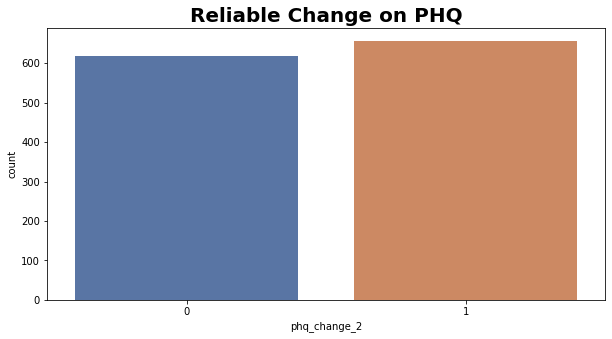

In [126]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change_2',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [127]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    619
1    656
Name: phq_post, dtype: int64

In [128]:
df2["percent_phq"] = (df2["phq_post"]/df2["phq_d_sum"])*100

In [129]:
df2["percent_phq"] = np.where((df2['percent_phq'] <= 50),0,1) 

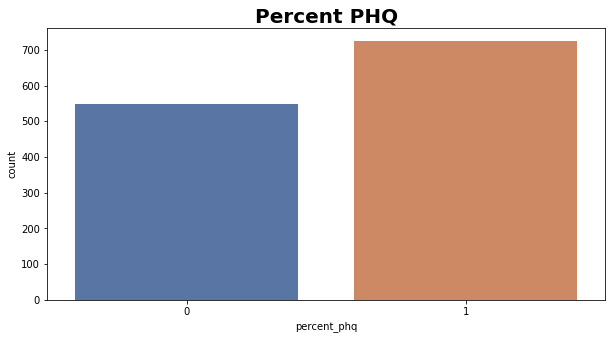

In [130]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('percent_phq',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Percent PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [131]:
df2["phq_change_2"] = np.where((((df2['percent_phq'] ==0) & (df2["phq_post"] <= 9)) | ((df2["phq_d_sum"] >= 5) \
                        & (df2["phq_post"] <= 4))),0,1)

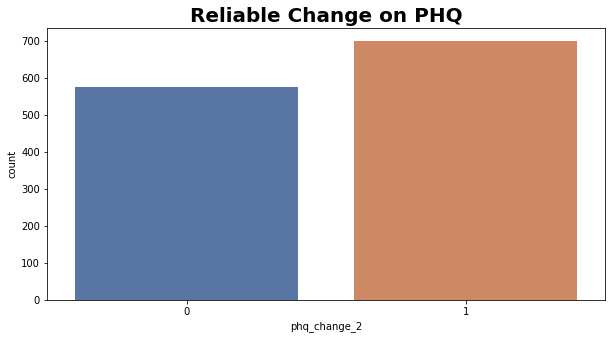

In [132]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change_2',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [133]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    575
1    700
Name: phq_post, dtype: int64

In [134]:
df2["phq_change_2"] = np.where(((df2['percent_phq'] ==0) & (df2["phq_post"] <= 9)),0,1)

In [135]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    548
1    727
Name: phq_post, dtype: int64

In [136]:
df2.drop(["phq_post"], axis=1, inplace=True)

In [137]:
from tableone import TableOne

In [138]:
columns = ['age', 'PRE_sex', 'n_diagn', 'bmi_score', 'phq_change', 'PRE_bdi_sum',
'PRE_education', 
 'phq_d_sum',
 'phq_early_change',
 'phq_s_sum',
 'eurohis_sum',
 'imet_sum',
 'gad_sum',
 'costa_sum',
 'pathev_sum',
 'euheals_sum',
 'ipqr_sum',
 'gpse_sum',
'bsss_perceived',
 'bsss_suppseek']

In [139]:
columns = ['age', 'PRE_sex','phq_change', 'n_diagn', 'PRE_education']

In [140]:
categorical = ['PRE_education']

In [141]:
groupby = 'phq_change'

In [142]:
mytable = TableOne(df2, columns=columns,
                   groupby=groupby)

In [143]:
print(mytable.tabulate(tablefmt="github"))

|                      |    | Missing   | Overall     | -1.0        | -11.0      | -2.0        | -3.0        | -4.0        | -5.0        | -6.0        | -7.0        | -8.0       | -9.0       | 0.0         | 1.0         | 10.0        | 11.0        | 12.0        | 13.0        | 14.0        | 15.0        | 16.0       | 17.0        | 18.0        | 2.0         | 22.0       | 3.0         | 4.0         | 5.0         | 6.0         | 7.0         | 8.0         | 9.0         |
|----------------------|----|-----------|-------------|-------------|------------|-------------|-------------|-------------|-------------|-------------|-------------|------------|------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|------------|-------------|-------------|-------------|------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| n                    |    |           | 1275        | 42

### 1.2.9 Prepare missing values for RF Skript

In [144]:
#miss_df2 = missing_values_table(df2)

In [145]:
#df2.columns.tolist()

In [146]:
#missing_cols = list(miss_df2.index)

### 1.3 Export pepared data for RF Skript

In [147]:
filename = path + "prepared_data_final.csv"
df2.to_csv(filename, sep=";", encoding="utf-8")

In [148]:
df2.to_csv(filename, sep=";", encoding="utf-8")

In [149]:
y = df2["phq_change"]

In [150]:
X = df2.drop("phq_change", axis=1)

In [151]:
X_test = X[:]

## 2.0 Build Random Forest Model

Best practise for Training Random Forests:
* Factor out linear relationships between predictor and response (strong linear relationships often overpowers subtler effects) --> change target variable (ggf. anderes Outcome). Andere Idee: erstmal linear Regression, dann Random Forest on Residuals 
    * wichtig: R^2 can be misleading, when comparing models with linear components vs. nonlinear 
* Feature Engineering is key: 
    * use domain knowledge as a guide
    * explicitly define interaction effects as new predictors (wenn man bereits davon ausgeht, dass es welche gibt)
    * use multiple metrics that are proxies for the same concept as predictors (leads to better performance, can help make the model less vulnerable to outliers)
* Best Practices for Interpreting Random Forests: 
    * Check that feature importances align with expectations/intuition
    * confirm which features are actually adding predictive value
    * if features expected to be important are not --> data or model issues
* Check directional relationship between top predictors and response 
    * Manually step through 4-5 levels of a few trees to detect patterns 
    * "Stress Test" the model with syn thetic data, that varies the value of one predictor while holding the others equal 
* Visualize Random Forests with scikit-learn

In [152]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 42)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = df2["phq_change"], test_size = 0.33, random_state= 1)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### Scale BMI Score

In [ ]:
from sklearn.preprocessing import StandardScaler
bmi_scaler = StandardScaler()

In [ ]:
X_train["bmi_score"] = bmi_scaler.fit_transform(X_train[["bmi_score"]])

In [ ]:
X_test["bmi_score"] = bmi_scaler.transform(X_test[["bmi_score"]])

### Scale Age

In [ ]:
age_scaler = StandardScaler()

In [ ]:
X_train["age"] = age_scaler.fit_transform(X_train[["age"]])

In [ ]:
X_test["age"] = age_scaler.transform(X_test[["age"]])

### Scale PRE Internet

In [ ]:
internet_scaler = StandardScaler()

In [ ]:
X_train["PRE_internet"] = internet_scaler.fit_transform(X_train[["PRE_internet"]])

In [ ]:
X_test["PRE_internet"] = internet_scaler.transform(X_test[["PRE_internet"]])

### 2.1 Training Set

In [ ]:
y_train = np.array(y_train)

In [ ]:
feature_names = list(X.columns)

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train.shape

In [ ]:
X_train.shape[1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf_y_pred= clf.predict(X_test)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state = 42, oob_score=True, class_weight='balanced', max_depth = 6)
#rfe = RFE(estimator=rf, n_features_to_select=100)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
y_test[:]

In [ ]:
y_prediction = np.zeros((len(y_test), 3))
y_prediction[:,0] = rf.predict(X_test)
y_prediction[:,1] = y_test[:]

counter_class1_correct = 0
counter_class2_correct = 0
counter_class1_incorrect = 0
counter_class2_incorrect = 0

for i in range(len(y_test)):
    if y_prediction[i,0] == y_prediction[i,1]:
        y_prediction[i,2] = 1
        if y_prediction[i,1] == 1:
            counter_class1_correct += 1
        else:
            counter_class2_correct += 1
    else:
        y_prediction[i,2] = 0
        if y_prediction[i,1] == 1:
            counter_class1_incorrect += 1
        else:
            counter_class2_incorrect += 1

In [ ]:
clf_y_prediction = np.zeros((len(y_test), 3))
clf_y_prediction[:,0] = clf.predict(X_test)
clf_y_prediction[:,1] = y_test[:]

clf_counter_class1_correct = 0
clf_counter_class2_correct = 0
clf_counter_class1_incorrect = 0
clf_counter_class2_incorrect = 0

for i in range(len(y_test)):
    if clf_y_prediction[i,0] == clf_y_prediction[i,1]:
        clf_y_prediction[i,2] = 1
        if clf_y_prediction[i,1] == 1:
            clf_counter_class1_correct += 1
        else:
            clf_counter_class2_correct += 1
    else:
        clf_y_prediction[i,2] = 0
        if clf_y_prediction[i,1] == 1:
            clf_counter_class1_incorrect += 1
        else:
            clf_counter_class2_incorrect += 1

In [ ]:
accuracy = y_prediction.mean(axis=0)[2]
accuracy_class1 = counter_class1_correct / (counter_class1_correct + counter_class1_incorrect)
accuracy_class2 = counter_class2_correct / (counter_class2_correct + counter_class2_incorrect)
balanced_accuracy = (accuracy_class1 + accuracy_class2) / 2
oob_accuracy = rf.oob_score_
log_loss_value = log_loss(y_test, rf.predict_proba(X_test), normalize=True)

In [ ]:
clf_accuracy = clf_y_prediction.mean(axis=0)[2]
clf_accuracy_class1 = clf_counter_class1_correct / (clf_counter_class1_correct + clf_counter_class1_incorrect)
clf_accuracy_class2 = clf_counter_class2_correct / (clf_counter_class2_correct + clf_counter_class2_incorrect)
clf_balanced_accuracy = (clf_accuracy_class1 + clf_accuracy_class2) / 2

In [ ]:
fpr, tpr, __ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
print('\nAccuracy: ', str(accuracy), '\nAccuracy_class0: ', str(accuracy_class1), '\nAccuracy_class1: ', 
        str(accuracy_class2), '\nBalanced Accuracy: ', str(balanced_accuracy), '\nOOB Accuracy ', str(oob_accuracy), '\nLog Loss value: ', str(log_loss_value))

In [ ]:
print('\nAccuracy: ', str(clf_accuracy), '\nAccuracy_class0: ', str(clf_accuracy_class1), '\nAccuracy_class1: ', 
      str(clf_accuracy_class2), '\nBalanced Accuracy: ', str(clf_balanced_accuracy))

#

In [ ]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: {}".format(accuracy))

print("\nOOB Score: {}".format(rf.oob_score_))

# Nun sagen wir unseren Testdatensatz mithilfe des Test Datensatzes vorher. 
# Dieser wurde von unserem Modell noch nie gesehen. 
    
rf_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy: {}".format(rf_accuracy))

rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("\nBalanced Accuracy: {}".format(rf_balanced_accuracy))

rf_precision = precision_score(y_test, y_pred)
print("\nPrecision: {}".format(rf_precision))

rf_recall = recall_score(y_test, y_pred)
print("\nRecall: {}".format(rf_recall))


In [ ]:
rep = classification_report(y_test, y_pred)

In [ ]:
print(rep)

In [ ]:
# Plot Confusion Matrix 
fig, ax = plt.subplots(figsize=(10, 10))

confusion_matrix(y_pred, y_test)
metrics.plot_confusion_matrix(rf, X_test, y_test, normalize=None, ax=ax)

In [ ]:
# Erstelle einen Dataframe mit True und Predicted Values und der errechneten Wahrscheinlichkeit  

probabilities = rf.predict_proba(X_test)

rf_df = pd.DataFrame(zip(y_test, y_pred, probabilities), 
                   columns = ["Actual Value", "Predicted Value", "Probability (left: No, right: Yes)"])

rf_df["Result"] = np.where(rf_df["Actual Value"] == rf_df["Predicted Value"], "Right", "Wrong")


rf_df.set_index("Actual Value").head(20)

### Check feature importance 

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances.shape

In [ ]:
#importances = importances.reshape((1,272))

In [ ]:
#importances.shape[1]

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices.shape

In [ ]:
names = [feature_names[i] for i in indices]

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1])[:20], importances[indices][:20])
plt.xticks(range(20), names, rotation=90)
plt.show()

In [ ]:
a = [0.661764705882353, 0.5983606557377049, 0.6507936507936509, 0.5897435897435898, 0.611111111111111]
b = [0.6395114503816794, 0.6169416671778201, 0.6573614937251301, 0.6223391240518718, 0.6213580322640004]
c = zip(a,b)


In [ ]:
def calculate_diff(zipped_lists, X_train, X_test):
    
    diff = [y - x for y, x in zipped_lists]
    #Compute the mean of differences
    d_bar = np.mean(diff)
    #compute the variance of differences
    sigma2 = np.var(diff)
    #compute the number of data points used for training 
    n1 = len(X_train)
    #compute the number of data points used for testing 
    n2 = len(X_test)
    #compute the total number of data points
    n = n1+n2
    #compute the modified variance
    sigma2_mod = sigma2 * (1/n + n2/n1)
    #compute the t_static
    t_static =  d_bar / np.sqrt(sigma2_mod)
    #Compute p-value and plot the results 
    p = 200*(1 - t.cdf(t_static, n-1))

    return p

In [ ]:
diff = [y - x for y, x in c]

In [ ]:
import numpy as np
from scipy.stats import t
d_bar = np.mean(diff)
sigma2 = np.var(diff)


In [ ]:
n1 = 1000
n2 = 300
n = n1+n2

In [ ]:
sigma2_mod = sigma2 * (1/n + n2/n1)

In [ ]:
sigma2_mod

In [ ]:
t_static = d_bar / np.sqrt(sigma2_mod)

In [ ]:
p = ((1.0 - t.cdf(t_static, n-1))*2)

In [ ]:
p

In [ ]:
from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_folds, n_test_folds, alpha):
    n = len(data1)
    differences = [(data1[i]-data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_folds / n_training_folds  
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p


In [ ]:
corrected_dependent_ttest(a,b,100,50,0.05)

In [ ]:
len(c)